Analalis de série temporal del data set de Afiliaciones por sectores de Rubí

In [167]:
import pandas as pd
import matplotlib.pyplot as plt

In [168]:
# Cargar los datos
datos = pd.read_excel("./Downloads/Afiliacions_Exemple_Mitjanes_Anuals.xlsx", header = 0)

In [169]:
datos.head()

,Unnamed: 0,Agricultura,Indústria,Construcció,Serveis,Total
0,2023-08-01,70,7145,2405,26350,35970
1,2023-07-01,70,7170,2430,26595,36260
2,2023-06-01,70,7185,2450,26720,36425
3,2023-05-01,65,7180,2435,26975,36660
4,2023-04-01,65,7170,2440,27005,36675


In [170]:
# Cambiar el nombre de la columna 'Unnamed: 0' a 'Fecha'
datos.rename(columns={'Unnamed: 0': 'Fecha'}, inplace = True)

In [171]:
datos.head(73)

,Fecha,Agricultura,Indústria,Construcció,Serveis,Total
0,2023-08-01,70,7145,2405,26350,35970
1,2023-07-01,70,7170,2430,26595,36260
2,2023-06-01,70,7185,2450,26720,36425
3,2023-05-01,65,7180,2435,26975,36660
4,2023-04-01,65,7170,2440,27005,36675
...,...,...,...,...,...,...
68,2013-03-01,60,6631,1833,20336,28860
69,2012-12-01,55,6676,1896,20406,29033
70,2012-09-01,74,6843,1958,20706,29581
71,2012-06-01,76,6948,2023,20542,29589


In [172]:
# Extraer el año y crear una nueva columna 'Año'
datos['Año'] = datos['Fecha'].dt.year

In [173]:
datos.head()

,Fecha,Agricultura,Indústria,Construcció,Serveis,Total,Año
0,2023-08-01,70,7145,2405,26350,35970,2023
1,2023-07-01,70,7170,2430,26595,36260,2023
2,2023-06-01,70,7185,2450,26720,36425,2023
3,2023-05-01,65,7180,2435,26975,36660,2023
4,2023-04-01,65,7170,2440,27005,36675,2023


# Visualización de las series temporales 

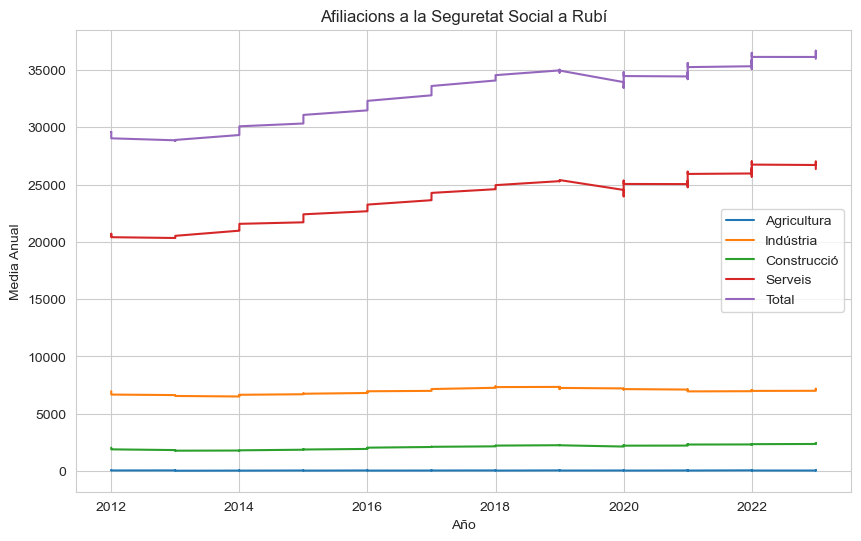

In [174]:
#Crea un gráfico de serie temporal para cada sector
plt.figure(figsize=(10,6))
plt.plot(datos['Año'], datos['Agricultura'], label='Agricultura')
plt.plot(datos['Año'], datos['Indústria'], label='Indústria')
plt.plot(datos['Año'], datos['Construcció'], label='Construcció')
plt.plot(datos['Año'], datos['Serveis'], label='Serveis')
plt.plot(datos['Año'], datos['Total'], label='Total')

# Añade etiquetas y título
plt.xlabel('Año')
plt.ylabel('Media Anual')
plt.title('Afiliacions a la Seguretat Social a Rubí')

# Muestra la leyenda
plt.legend()

# Muestra el gráfico
plt.grid(True)
plt.show()

## 1. Visualización de la Tendencia:

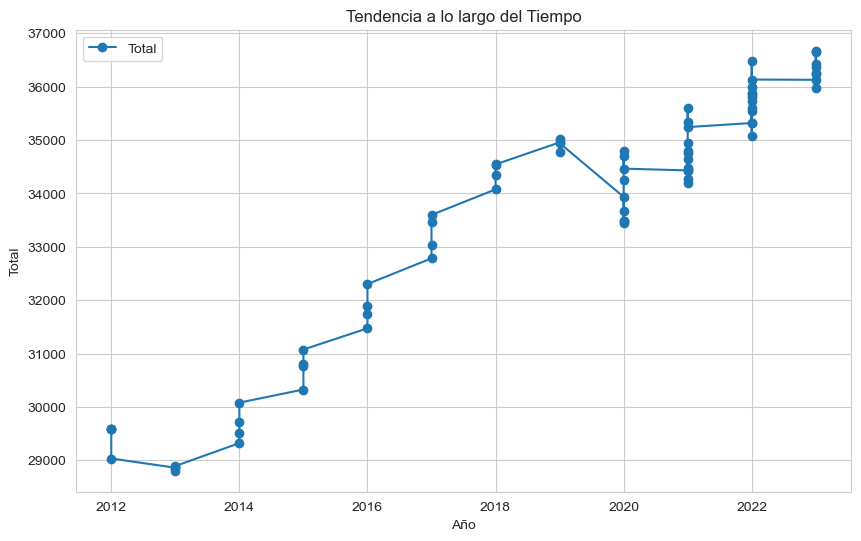

In [175]:
import pandas as pd
import matplotlib.pyplot as plt

# Visualizar la tendencia del total
plt.figure(figsize=(10,6))
plt.plot(datos['Año'], datos['Total'], label = 'Total', marker='o', linestyle='-')
plt.title('Tendencia a lo largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Total')
plt.legend()
plt.grid(True)
plt.show()

## 2. Suavización de la Tendencia con Media Móvil:

In [176]:
# Calcular la media móvil
datos['Media Móvil'] = datos['Total'].rolling(window=3).mean()  # Puedes ajustar el tamaño de la ventana


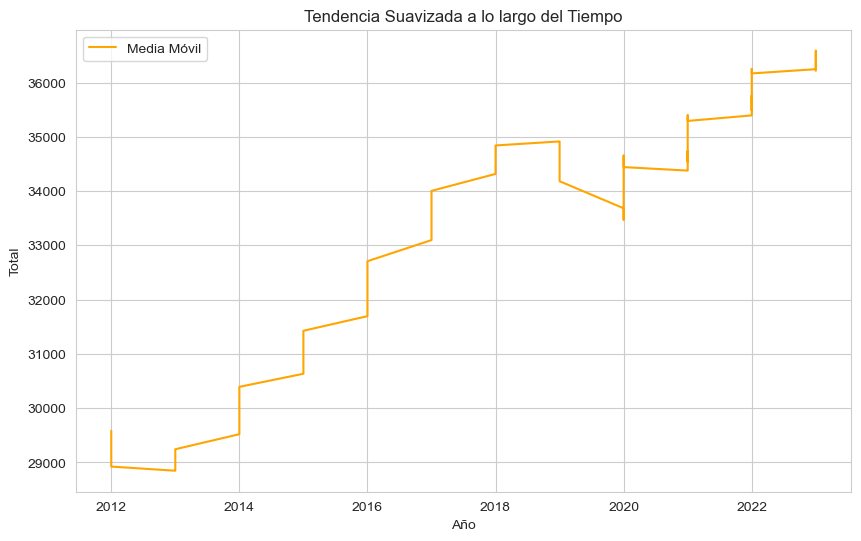

In [177]:
# Visualizar la tendencia suavizada
plt.figure(figsize=(10,6))
plt.plot(datos['Año'], datos['Media Móvil'], marker='', linestyle='-', color='orange', label='Media Móvil')
plt.title('Tendencia Suavizada a lo largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Total')
plt.grid(True)
plt.legend()
plt.show()

## Modelado de la tendencia:

In [109]:
!pip install scikit-learn

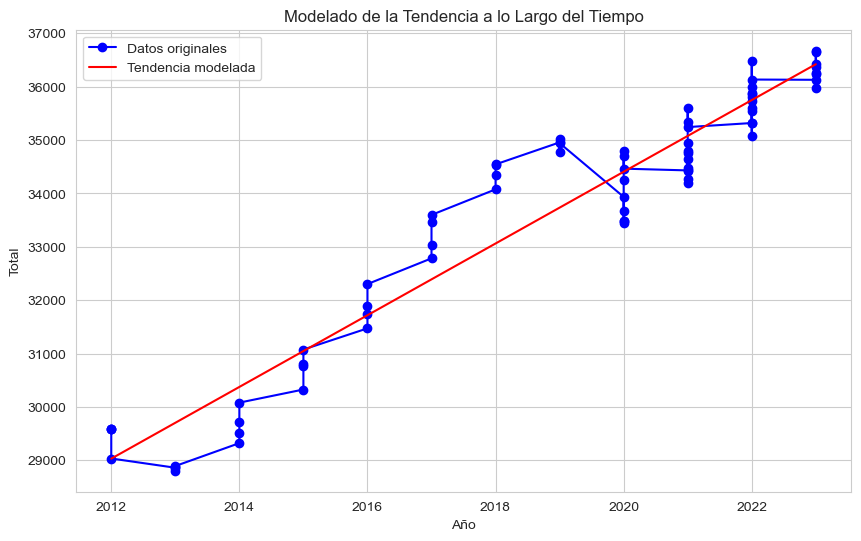

In [178]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Preparar los datos para el modelo de regresión
X = datos['Año'].values.reshape(-1, 1)  # Años
y = datos['Total'].values  # Totales

# Crear y entrenar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X, y)

# Predecir los valores
predicciones = modelo.predict(X)

# Establecer el estilo de Seaborn
sns.set_style("whitegrid")

# Graficar los datos originales y la tendencia modelada
plt.figure(figsize=(10,6))
plt.plot(datos['Año'], datos['Total'], marker='o', linestyle='-', color='blue', label='Datos originales')
plt.plot(datos['Año'], predicciones, color='red', label='Tendencia modelada')

# Configurar el título y las etiquetas
plt.title('Modelado de la Tendencia a lo Largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Total')
plt.grid(True)

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()


In [179]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Preparar los datos para el modelo de regresión
X = datos['Año'].values.reshape(-1, 1)  # Años
y = datos['Total'].values  # Totales

# Crear y entrenar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X, y)

# Obtener la pendiente (m) y la intersección y (b)
m = modelo.coef_[0]
b = modelo.intercept_

print(f"La ecuación de la línea de tendencia es y = {m:.2f}x + {b:.2f}")


La ecuación de la línea de tendencia es y = 672.01x + -1323059.50


In [180]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import plotly.graph_objs as go

# Preparar los datos para el modelo de regresión
X = datos['Año'].values.reshape(-1, 1)  
y = datos['Total'].values  

# Crear y entrenar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X, y)

# Predecir los valores
predicciones = modelo.predict(X)

# Crear el gráfico
trace1 = go.Scatter(x=datos['Año'], y=datos['Total'], mode='lines+markers', name='Datos originales')
trace2 = go.Scatter(x=datos['Año'], y=predicciones, mode='lines', name='Tendencia modelada')

layout = go.Layout(
    title='Modelado de la Tendencia a lo Largo del Tiempo',
    xaxis=dict(title='Año'),
    yaxis=dict(title='Total'),
    showlegend=True
)

fig = go.Figure(data=[trace1, trace2], layout=layout)
fig.show()


## Estacionalidad:

In [115]:
!pip install statsmodels

In [181]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


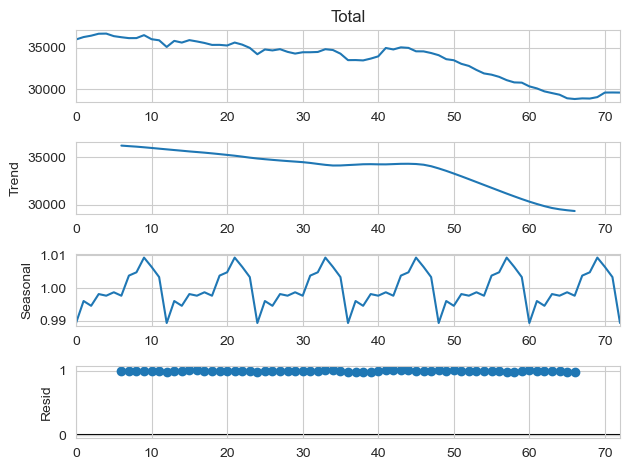

In [182]:
# Realiza la descomposición estacional
resultado = seasonal_decompose(datos['Total'], model='multiplicative', period = 12)  # O 'additive' dependiendo de la naturaleza de tus datos

# Plotea los componentes descompuestos de la serie temporal
resultado.plot()
plt.show()


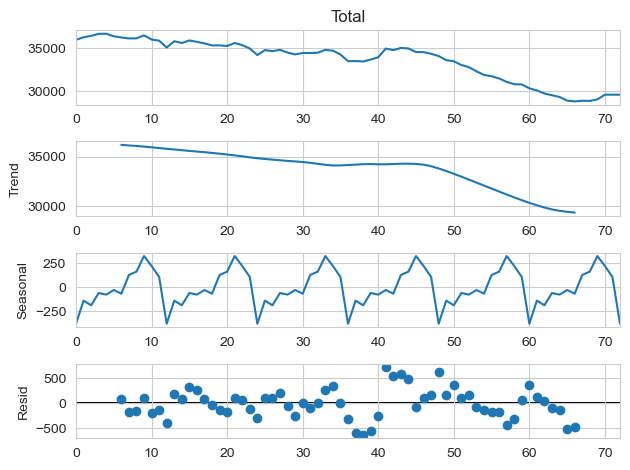

In [183]:
# Realiza la descomposición estacional
resultado = seasonal_decompose(datos['Total'], model='additive', period = 12)  # O 'additive' dependiendo de la naturaleza de tus datos

# Plotea los componentes descompuestos de la serie temporal
resultado.plot()
plt.show()

In [184]:
from scipy import stats
z_scores = stats.zscore(datos['Total'])
abs_z_scores = np.abs(z_scores)
outliers = (abs_z_scores > 3)  # Cambia 3 a tu criterio
outliers

0     False
1     False
2     False
3     False
4     False
      ...  
68    False
69    False
70    False
71    False
72    False
Name: Total, Length: 73, dtype: bool

In [185]:
outliers_values = datos['Total'][outliers]
print(outliers_values)

Series([], Name: Total, dtype: int64)


In [186]:
datos['Volatilidad'] = datos['Total'].rolling(window=12).std()
print(datos['Volatilidad'])

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
         ...    
68    840.666024
69    750.955432
70    646.226600
71    506.327979
72    418.203409
Name: Volatilidad, Length: 73, dtype: float64


In [187]:
correlacion = datos[['Agricultura', 'Indústria', 'Construcció', 'Serveis']].corr()
print(correlacion)

             Agricultura  Indústria  Construcció   Serveis
Agricultura     1.000000   0.285389     0.347376  0.159257
Indústria       0.285389   1.000000     0.774789  0.717201
Construcció     0.347376   0.774789     1.000000  0.949856
Serveis         0.159257   0.717201     0.949856  1.000000


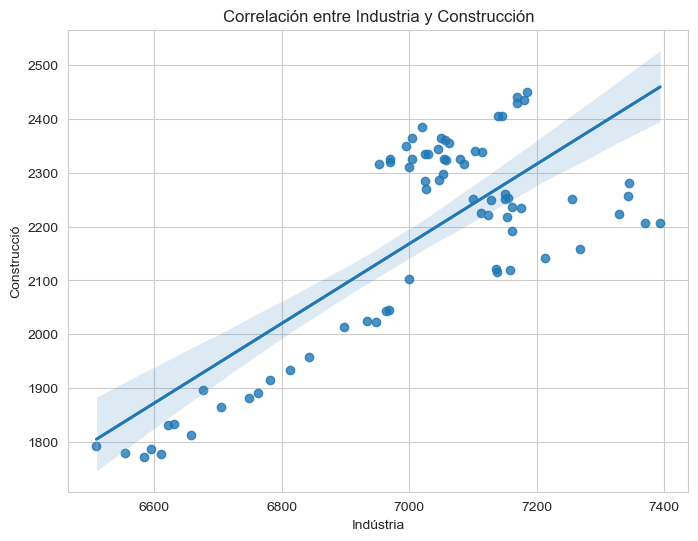

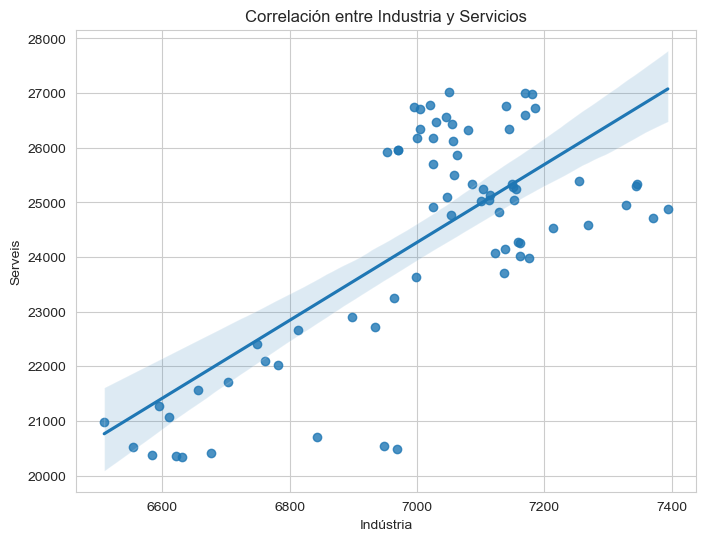

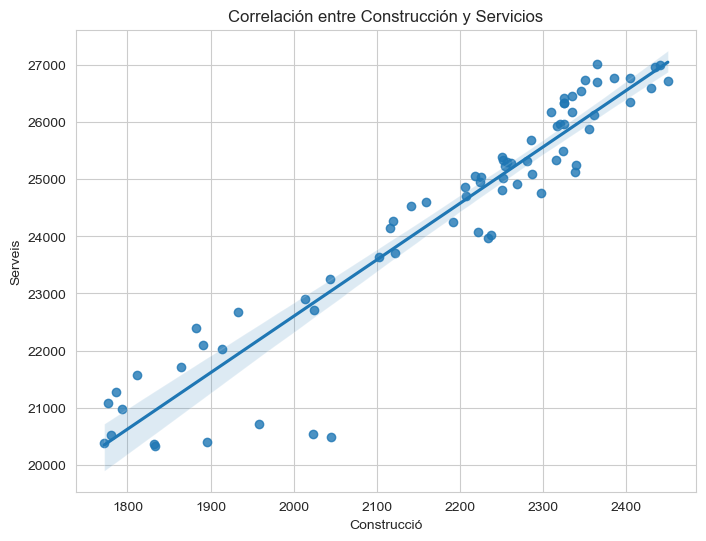

In [188]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de dispersión con línea de mejor ajuste para Industria vs Construcción
plt.figure(figsize=(8, 6))
sns.regplot(data=datos, x='Indústria', y='Construcció')
plt.title('Correlación entre Industria y Construcción')
plt.show()

# Gráfico de dispersión con línea de mejor ajuste para Industria vs Servicios
plt.figure(figsize=(8, 6))
sns.regplot(data=datos, x='Indústria', y='Serveis')
plt.title('Correlación entre Industria y Servicios')
plt.show()

# Gráfico de dispersión con línea de mejor ajuste para Construcción vs Servicios
plt.figure(figsize=(8, 6))
sns.regplot(data=datos, x='Construcció', y='Serveis')
plt.title('Correlación entre Construcción y Servicios')
plt.show()

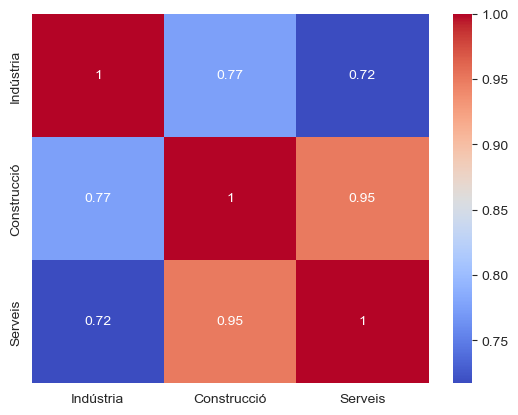

In [189]:
# Calcula la matriz de correlación
corr = datos[['Indústria', 'Construcció', 'Serveis']].corr()

# Crea un mapa de calor de la matriz de correlación
sns.heatmap(corr, annot=True, cmap='coolwarm', xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

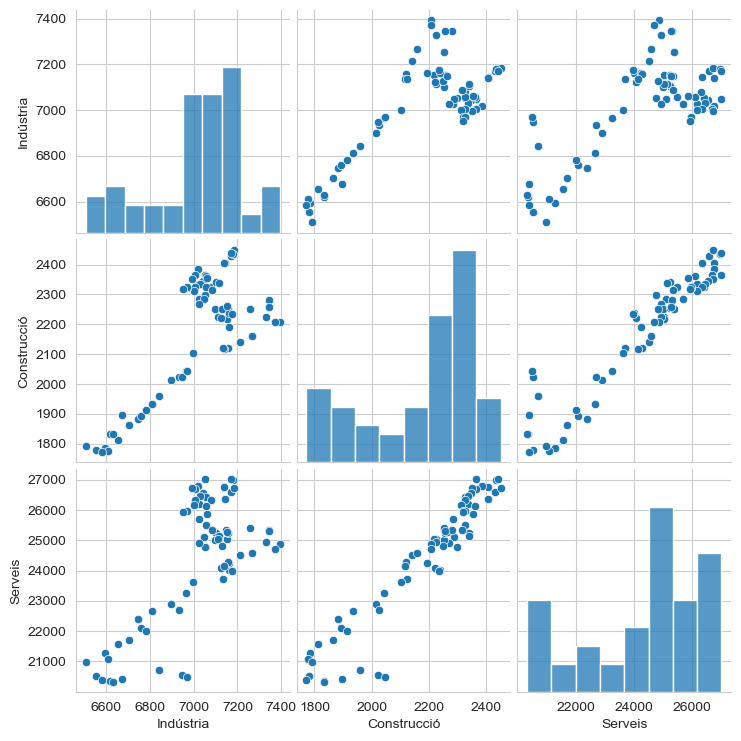

In [190]:
sns.pairplot(datos[['Indústria', 'Construcció', 'Serveis']])
plt.show()

In [191]:
import numpy as np

# Ajuste de un polinomio de primer grado (una línea) para Industria vs Construcción
coef_ind_con = np.polyfit(datos['Indústria'], datos['Construcció'], 1)
print(f"Relación entre Industria y Construcción: y = {coef_ind_con[0]:.2f}x + {coef_ind_con[1]:.2f}")

# Ajuste de un polinomio de primer grado (una línea) para Industria vs Servicios
coef_ind_ser = np.polyfit(datos['Indústria'], datos['Serveis'], 1)
print(f"Relación entre Industria y Servicios: y = {coef_ind_ser[0]:.2f}x + {coef_ind_ser[1]:.2f}")

# Ajuste de un polinomio de primer grado (una línea) para Construcción vs Servicios
coef_con_ser = np.polyfit(datos['Construcció'], datos['Serveis'], 1)
print(f"Relación entre Construcción y Servicios: y = {coef_con_ser[0]:.2f}x + {coef_con_ser[1]:.2f}")

Relación entre Industria y Construcción: y = 0.74x + -3011.51
Relación entre Industria y Servicios: y = 7.13x + -25652.04
Relación entre Construcción y Servicios: y = 9.89x + 2822.75


## Regresión Multiple

In [192]:
import statsmodels.api as sm

# Definir tus variables independientes y dependientes
X = datos[['Indústria', 'Construcció', 'Serveis']]
y = datos['Total']

# Agregar una constante a las variables independientes para el término de intercepción
X = sm.add_constant(X)

# Ajustar el modelo
modelo = sm.OLS(y, X).fit()

# Imprimir los resultados
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.796e+06
Date:                Wed, 04 Oct 2023   Prob (F-statistic):          2.51e-175
Time:                        13:09:40   Log-Likelihood:                -244.09
No. Observations:                  73   AIC:                             496.2
Df Residuals:                      69   BIC:                             505.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          50.6885     35.178      1.441      

In [193]:
from sklearn.linear_model import LinearRegression

# Definir tus variables independientes y dependientes
X = datos[['Indústria', 'Construcció', 'Serveis']]
y = datos['Total']

# Crear y entrenar el modelo
modelo = LinearRegression().fit(X, y)

# Imprimir los coeficientes
print('Coeficientes:', modelo.coef_)
print('Intercepción:', modelo.intercept_)

Coeficientes: [0.99933033 1.08805717 0.99265478]
Intercepción: 50.68845717301883


### Total=0.9993×(Indústria)+1.0881×(Construcción)+0.9927×(Serveis)+50.6885

In [194]:
# Hacer una predicción
predicciones = modelo.predict(X)

# Agregar las predicciones al DataFrame
datos['Predicción'] = predicciones

# Ver los resultados
print(datos[['Total', 'Predicción']])
print(datos)

    Total    Predicción
0   35970  35964.134633
1   36260  36259.519742
2   36425  36420.352688
3   36660  36652.162148
4   36675  36677.388774
..    ...           ...
68  28860  28858.284285
69  29033  29041.287586
70  29581  29573.431730
71  29589  29586.289746
72  29579  29582.566181

[73 rows x 2 columns]
        Fecha  Agricultura  Indústria  Construcció  Serveis  Total   Año  \
0  2023-08-01           70       7145         2405    26350  35970  2023   
1  2023-07-01           70       7170         2430    26595  36260  2023   
2  2023-06-01           70       7185         2450    26720  36425  2023   
3  2023-05-01           65       7180         2435    26975  36660  2023   
4  2023-04-01           65       7170         2440    27005  36675  2023   
..        ...          ...        ...          ...      ...    ...   ...   
68 2013-03-01           60       6631         1833    20336  28860  2013   
69 2012-12-01           55       6676         1896    20406  29033  2012   
70 20

In [195]:
from sklearn.metrics import mean_squared_error

# Calcular el error cuadrático medio
mse = mean_squared_error(datos['Total'], datos['Predicción'])

# Imprimir el error cuadrático medio
print('Error Cuadrático Medio:', mse)

Error Cuadrático Medio: 46.96447134235665


In [196]:
import numpy as np
import pandas as pd

# Coeficientes e intercepción del modelo
coeficientes = np.array([0.99933033, 1.08805717, 0.99265478])
intercepcion = 50.68845717301883

# Generar valores enteros aleatorios para Industria, Construcción y Servicios basados en los rangos existentes en los datos
np.random.seed(0)  # Para reproducibilidad
industria_aleatoria = np.random.randint(datos['Indústria'].min(), datos['Indústria'].max() + 1, 50)
construccion_aleatoria = np.random.randint(datos['Construcció'].min(), datos['Construcció'].max() + 1, 50)
servicios_aleatorios = np.random.randint(datos['Serveis'].min(), datos['Serveis'].max() + 1, 50)

# Calcular el total basado en la ecuación del modelo
total_predicho = coeficientes[0] * industria_aleatoria + coeficientes[1] * construccion_aleatoria + coeficientes[2] * servicios_aleatorios + intercepcion

# Convertir el total predicho a entero
total_predicho = total_predicho.astype(int)

# Crear un DataFrame para mostrar los resultados
resultados = pd.DataFrame({
    'Indústria': industria_aleatoria,
    'Construcción': construccion_aleatoria,
    'Servicios': servicios_aleatorios,
    'Total Estimado': total_predicho
})

# Ordenar los resultados de menor a mayor basado en el total estimado
resultados_ordenados = resultados.sort_values(by='Total Estimado').reset_index(drop=True)

print(resultados_ordenados)

    Indústria  Construcción  Servicios  Total Estimado
0        7068          2016      20592           29748
1        7108          2045      20537           29765
2        7359          1903      20643           29966
3        7168          2145      20611           30007
4        6774          1941      21544           30317
5        7186          1854      21267           30359
6        7216          1955      21152           30385
7        6518          1900      21970           30440
8        7232          1900      21309           30497
9        7306          1999      21488           30856
10       6868          1800      22771           31476
11       6905          1814      22754           31511
12       6579          2107      22767           31517
13       6957          2411      22395           31856
14       7272          2231      22290           31871
15       7354          2170      22323           31919
16       7263          2322      22359           32030
17       7

In [197]:
import numpy as np
import pandas as pd

# Coeficientes e intercepción del modelo
coeficientes = np.array([0.99933033, 1.08805717, 0.99265478])
intercepcion = 50.68845717301883

# Generar valores enteros aleatorios para Industria, Construcción y Servicios basados en los rangos existentes en los datos
np.random.seed(0)  # Para reproducibilidad
industria_aleatoria = np.random.randint(datos['Indústria'].min(), datos['Indústria'].max() + 1, 73)
construccion_aleatoria = np.random.randint(datos['Construcció'].min(), datos['Construcció'].max() + 1, 73)
servicios_aleatorios = np.random.randint(datos['Serveis'].min(), datos['Serveis'].max() + 1, 73)

# Calcular el total basado en la ecuación del modelo
total_predicho = coeficientes[0] * industria_aleatoria + coeficientes[1] * construccion_aleatoria + coeficientes[2] * servicios_aleatorios + intercepcion

# Convertir el total predicho a entero
total_predicho = total_predicho.astype(int)

# Calcular los valores de los coeficientes multiplicados por las variables
coef_industria = coeficientes[0] * industria_aleatoria
coef_construccion = coeficientes[1] * construccion_aleatoria
coef_servicios = coeficientes[2] * servicios_aleatorios

# Crear un DataFrame para mostrar los resultados
resultados = pd.DataFrame({
    'Indústria': industria_aleatoria,
    'Coef*Indústria': coef_industria,
    'Construcción': construccion_aleatoria,
    'Coef*Construcción': coef_construccion,
    'Servicios': servicios_aleatorios,
    'Coef*Servicios': coef_servicios,
    'Total Estimado': total_predicho
})

# Ordenar los resultados de menor a mayor basado en el total estimado
resultados_ordenados = resultados.sort_values(by='Total Estimado').reset_index(drop=True)

print(resultados_ordenados)

    Indústria  Coef*Indústria  Construcción  Coef*Construcción  Servicios  \
0        6692     6687.518568          1808        1967.207363      20543   
1        6782     6777.458298          2047        2227.253027      20360   
2        6701     6696.512541          1829        1990.056564      20973   
3        7272     7267.130160          1891        2057.516108      20430   
4        7218     7213.166322          2028        2206.579941      20361   
..        ...             ...           ...                ...        ...   
68       7264     7259.135517          2155        2344.763201      26051   
69       7311     7306.104043          1815        1974.823764      26591   
70       7019     7014.299586          2183        2375.228802      26521   
71       7068     7063.266772          2029        2207.667998      26766   
72       6981     6976.325034          2096        2280.567828      26930   

    Coef*Servicios  Total Estimado  
0     20392.107146           29097  
1

In [198]:
# Calcular los valores predichos con el modelo para cada fila en los datos originales
datos['Industria_Modelo'] = (coeficientes[0] * datos['Indústria']).astype(int)
datos['Construccion_Modelo'] = (coeficientes[1] * datos['Construcció']).astype(int)
datos['Servicios_Modelo'] = (coeficientes[2] * datos['Serveis']).astype(int)
datos['Total_Modelo'] = datos['Industria_Modelo'] + datos['Construccion_Modelo'] + datos['Servicios_Modelo'] + int(intercepcion)

# Calcular la diferencia entre los valores reales y los valores del modelo
datos['Dif_Industria'] = datos['Industria_Modelo'] - datos['Indústria']
datos['Dif_Construccion'] = datos['Construccion_Modelo'] - datos['Construcció']
datos['Dif_Servicios'] = datos['Servicios_Modelo'] - datos['Serveis']
datos['Dif_Total'] = datos['Total_Modelo'] - datos['Total']

# Determinar si cada valor aumentó o disminuyó
datos['Tendencia_Industria'] = np.where(datos['Dif_Industria'] > 0, 'Aumenta', 'Disminuye')
datos['Tendencia_Construccion'] = np.where(datos['Dif_Construccion'] > 0, 'Aumenta', 'Disminuye')
datos['Tendencia_Servicios'] = np.where(datos['Dif_Servicios'] > 0, 'Aumenta', 'Disminuye')
datos['Tendencia_Total'] = np.where(datos['Dif_Total'] > 0, 'Aumenta', 'Disminuye')

# Mostrar los resultados
columnas_interes = ['Industria_Modelo', 'Indústria', 'Tendencia_Industria',
                    'Construccion_Modelo', 'Construcció', 'Tendencia_Construccion',
                    'Servicios_Modelo', 'Serveis', 'Tendencia_Servicios',
                    'Total_Modelo', 'Total', 'Tendencia_Total']

resultados_comparacion = datos[columnas_interes]
print(resultados_comparacion)

    Industria_Modelo  Indústria Tendencia_Industria  Construccion_Modelo  \
0               7140       7145           Disminuye                 2616   
1               7165       7170           Disminuye                 2643   
2               7180       7185           Disminuye                 2665   
3               7175       7180           Disminuye                 2649   
4               7165       7170           Disminuye                 2654   
..               ...        ...                 ...                  ...   
68              6626       6631           Disminuye                 1994   
69              6671       6676           Disminuye                 2062   
70              6838       6843           Disminuye                 2130   
71              6943       6948           Disminuye                 2201   
72              6963       6968           Disminuye                 2225   

    Construcció Tendencia_Construccion  Servicios_Modelo  Serveis  \
0          2405   

In [147]:
# Guardar el DataFrame en un archivo CSV
resultados_comparacion.to_csv('resultados_comparacion.csv', index=False)

In [148]:
# Guardar el DataFrame en un archivo CSV en un directorio específico
resultados_comparacion.to_csv('./Downloads/resultados_comparacion.csv', index=False)

## Pronostico: ARIMA

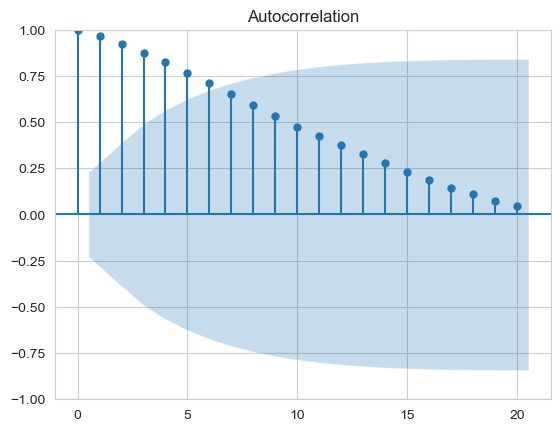

C:\Users\regidor\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



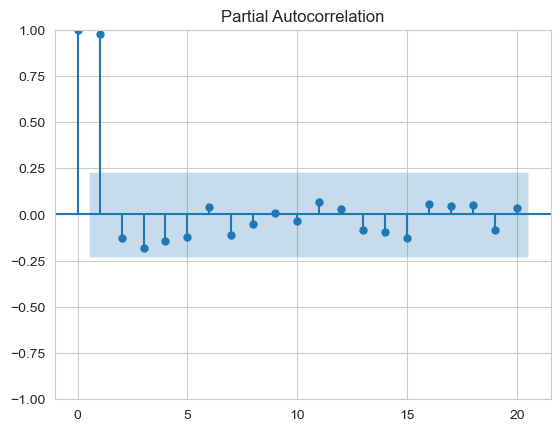

In [199]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Gráfica ACF
plot_acf(datos['Total'], lags=20)
plt.show()

# Gráfica PACF
plot_pacf(datos['Total'], lags=20)
plt.show()

In [200]:
from statsmodels.tsa.arima.model import ARIMA

# Ajustar el modelo ARIMA
# Los parámetros (5,1,0) son un ejemplo, debes ajustarlos según tus datos
modelo = ARIMA(datos['Total'], order=(5,1,0))
modelo_fit = modelo.fit()

# Resumen del modelo
print(modelo_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Total   No. Observations:                   73
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -518.040
Date:                Wed, 04 Oct 2023   AIC                           1048.079
Time:                        13:10:19   BIC                           1061.739
Sample:                             0   HQIC                          1053.517
                                 - 73                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0961      0.104      0.923      0.356      -0.108       0.300
ar.L2          0.1268      0.085      1.484      0.138      -0.041       0.294
ar.L3         -0.0148      0.101     -0.147      0.8

In [201]:
print(datos)

        Fecha  Agricultura  Indústria  Construcció  Serveis  Total   Año  \
0  2023-08-01           70       7145         2405    26350  35970  2023   
1  2023-07-01           70       7170         2430    26595  36260  2023   
2  2023-06-01           70       7185         2450    26720  36425  2023   
3  2023-05-01           65       7180         2435    26975  36660  2023   
4  2023-04-01           65       7170         2440    27005  36675  2023   
..        ...          ...        ...          ...      ...    ...   ...   
68 2013-03-01           60       6631         1833    20336  28860  2013   
69 2012-12-01           55       6676         1896    20406  29033  2012   
70 2012-09-01           74       6843         1958    20706  29581  2012   
71 2012-06-01           76       6948         2023    20542  29589  2012   
72 2012-03-01           72       6968         2045    20494  29579  2012   

     Media Móvil  Volatilidad    Predicción  ...  Servicios_Modelo  \
0            NaN 

                               SARIMAX Results                                
Dep. Variable:                  Total   No. Observations:                   73
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -518.040
Date:                Wed, 04 Oct 2023   AIC                           1048.079
Time:                        13:10:31   BIC                           1061.739
Sample:                             0   HQIC                          1053.517
                                 - 73                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0961      0.104      0.923      0.356      -0.108       0.300
ar.L2          0.1268      0.085      1.484      0.138      -0.041       0.294
ar.L3         -0.0148      0.101     -0.147      0.8

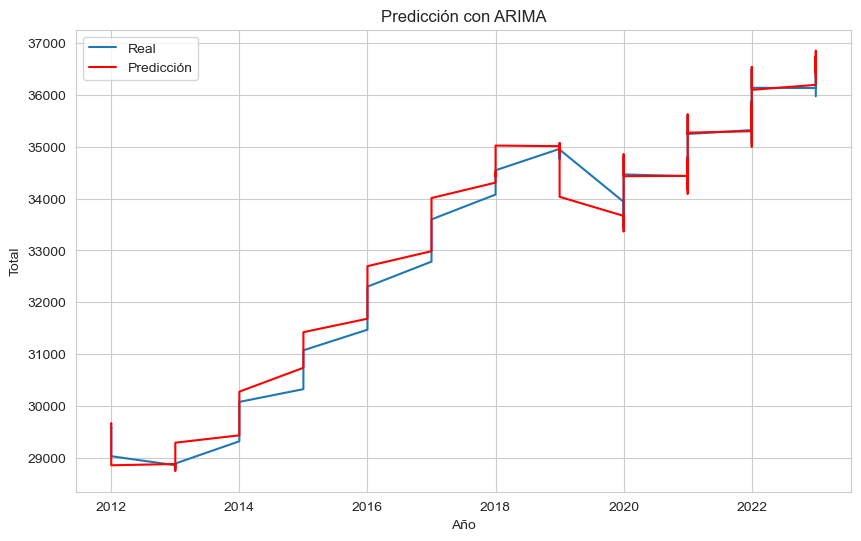

In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Ajustar el modelo ARIMA
modelo = ARIMA(datos['Total'], order=(5,1,0))
modelo_fit = modelo.fit()

# Resumen del modelo
print(modelo_fit.summary())

# Predicciones
datos['prediccion'] = modelo_fit.predict(start=1, end=len(datos))

# Gráfico de las predicciones
plt.figure(figsize=(10,6))
plt.plot(datos['Año'], datos['Total'], label='Real')
plt.plot(datos['Año'], datos['prediccion'], color='red', label='Predicción')
plt.title('Predicción con ARIMA')
plt.xlabel('Año')
plt.ylabel('Total')
plt.legend()
plt.show()

## Causalidad del modelo

In [203]:
import statsmodels.api as sm

# Seleccionar la variable independiente y agregar una constante al DataFrame
X = sm.add_constant(datos['Indústria'])

# Ajustar el modelo de regresión OLS (Ordinary Least Squares)
modelo = sm.OLS(datos['Total'], X).fit()

# Mostrar un resumen del modelo ajustado
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     100.4
Date:                Wed, 04 Oct 2023   Prob (F-statistic):           3.18e-15
Time:                        13:24:10   Log-Likelihood:                -639.27
No. Observations:                  73   AIC:                             1283.
Df Residuals:                      71   BIC:                             1287.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.869e+04   6223.759     -4.610      0.0

In [204]:
import statsmodels.api as sm

# Seleccionar la variable independiente y agregar una constante al DataFrame
X = sm.add_constant(datos['Construcció'])

# Ajustar el modelo de regresión OLS (Ordinary Least Squares)
modelo = sm.OLS(datos['Total'], X).fit()

# Mostrar un resumen del modelo ajustado
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     930.1
Date:                Wed, 04 Oct 2023   Prob (F-statistic):           1.56e-42
Time:                        13:24:16   Log-Likelihood:                -574.85
No. Observations:                  73   AIC:                             1154.
Df Residuals:                      71   BIC:                             1158.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        8096.6107    840.712      9.631      

In [205]:
import statsmodels.api as sm

# Seleccionar la variable independiente y agregar una constante al DataFrame
X = sm.add_constant(datos['Serveis'])

# Ajustar el modelo de regresión OLS (Ordinary Least Squares)
modelo = sm.OLS(datos['Total'], X).fit()

# Mostrar un resumen del modelo ajustado
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 1.210e+04
Date:                Wed, 04 Oct 2023   Prob (F-statistic):           4.63e-81
Time:                        13:24:25   Log-Likelihood:                -483.67
No. Observations:                  73   AIC:                             971.3
Df Residuals:                      71   BIC:                             975.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5256.1814    258.870     20.304      0.0

Para un análisis más profundo de la causalidad, podríamos considerar métodos más avanzados y específicos, como los modelos de ecuaciones estructurales, pruebas de causalidad de Granger, o métodos basados en la teoría de la causalidad de Judea Pearl, que incluyen gráficos causales y ecuaciones estructurales.

Para la prueba de causalidad de Granger, por ejemplo, el código se vería algo así:

In [206]:
from statsmodels.tsa.stattools import grangercausalitytests

# Suponiendo que queremos probar si 'Indústria' causa 'Total'
max_lag = 12
test = 'ssr_chi2test'
data = datos[['Indústria', 'Total']]

# Realizar la prueba de causalidad de Granger
granger_test_result = grangercausalitytests(data, max_lag, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0255  , p=0.8737  , df_denom=69, df_num=1
ssr based chi2 test:   chi2=0.0266  , p=0.8705  , df=1
likelihood ratio test: chi2=0.0266  , p=0.8705  , df=1
parameter F test:         F=0.0255  , p=0.8737  , df_denom=69, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1302  , p=0.8781  , df_denom=66, df_num=2
ssr based chi2 test:   chi2=0.2802  , p=0.8693  , df=2
likelihood ratio test: chi2=0.2797  , p=0.8695  , df=2
parameter F test:         F=0.1302  , p=0.8781  , df_denom=66, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.1466  , p=0.3373  , df_denom=63, df_num=3
ssr based chi2 test:   chi2=3.8221  , p=0.2813  , df=3
likelihood ratio test: chi2=3.7214  , p=0.2932  , df=3
parameter F test:         F=1.1466  , p=0.3373  , df_denom=63, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.8074  , p=0.5254  , df_d

In [207]:
from statsmodels.tsa.stattools import grangercausalitytests

# Suponiendo que queremos probar si 'Indústria' causa 'Total'
max_lag = 12
test = 'ssr_chi2test'
data = datos[['Construcció', 'Total']]

# Realizar la prueba de causalidad de Granger
granger_test_result = grangercausalitytests(data, max_lag, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.1185  , p=0.0818  , df_denom=69, df_num=1
ssr based chi2 test:   chi2=3.2541  , p=0.0712  , df=1
likelihood ratio test: chi2=3.1827  , p=0.0744  , df=1
parameter F test:         F=3.1185  , p=0.0818  , df_denom=69, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.5818  , p=0.5617  , df_denom=66, df_num=2
ssr based chi2 test:   chi2=1.2518  , p=0.5348  , df=2
likelihood ratio test: chi2=1.2409  , p=0.5377  , df=2
parameter F test:         F=0.5818  , p=0.5617  , df_denom=66, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.5939  , p=0.1997  , df_denom=63, df_num=3
ssr based chi2 test:   chi2=5.3130  , p=0.1503  , df=3
likelihood ratio test: chi2=5.1210  , p=0.1631  , df=3
parameter F test:         F=1.5939  , p=0.1997  , df_denom=63, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.3466  , p=0.2633  , df_d

In [208]:
from statsmodels.tsa.stattools import grangercausalitytests

# Suponiendo que queremos probar si 'Indústria' causa 'Total'
max_lag = 12
test = 'ssr_chi2test'
data = datos[['Serveis', 'Total']]

# Realizar la prueba de causalidad de Granger
granger_test_result = grangercausalitytests(data, max_lag, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2806  , p=0.2617  , df_denom=69, df_num=1
ssr based chi2 test:   chi2=1.3363  , p=0.2477  , df=1
likelihood ratio test: chi2=1.3241  , p=0.2499  , df=1
parameter F test:         F=1.2806  , p=0.2617  , df_denom=69, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.6773  , p=0.5115  , df_denom=66, df_num=2
ssr based chi2 test:   chi2=1.4572  , p=0.4826  , df=2
likelihood ratio test: chi2=1.4425  , p=0.4861  , df=2
parameter F test:         F=0.6773  , p=0.5115  , df_denom=66, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5182  , p=0.6713  , df_denom=63, df_num=3
ssr based chi2 test:   chi2=1.7273  , p=0.6309  , df=3
likelihood ratio test: chi2=1.7063  , p=0.6355  , df=3
parameter F test:         F=0.5182  , p=0.6713  , df_denom=63, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.7001  , p=0.5949  , df_d

In [209]:
from statsmodels.tsa.stattools import grangercausalitytests

# Suponiendo que queremos probar si 'Indústria' causa 'Total'
max_lag = 12
test = 'ssr_chi2test'
data = datos[['Indústria', 'Construcció']]

# Realizar la prueba de causalidad de Granger
granger_test_result = grangercausalitytests(data, max_lag, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.6012  , p=0.2100  , df_denom=69, df_num=1
ssr based chi2 test:   chi2=1.6708  , p=0.1962  , df=1
likelihood ratio test: chi2=1.6517  , p=0.1987  , df=1
parameter F test:         F=1.6012  , p=0.2100  , df_denom=69, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.8233  , p=0.4434  , df_denom=66, df_num=2
ssr based chi2 test:   chi2=1.7714  , p=0.4124  , df=2
likelihood ratio test: chi2=1.7497  , p=0.4169  , df=2
parameter F test:         F=0.8233  , p=0.4434  , df_denom=66, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.0372  , p=0.3823  , df_denom=63, df_num=3
ssr based chi2 test:   chi2=3.4573  , p=0.3263  , df=3
likelihood ratio test: chi2=3.3747  , p=0.3374  , df=3
parameter F test:         F=1.0372  , p=0.3823  , df_denom=63, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.7561  , p=0.5579  , df_d

In [210]:
from statsmodels.tsa.stattools import grangercausalitytests

# Suponiendo que queremos probar si 'Indústria' causa 'Total'
max_lag = 12
test = 'ssr_chi2test'
data = datos[['Indústria', 'Serveis']]

# Realizar la prueba de causalidad de Granger
granger_test_result = grangercausalitytests(data, max_lag, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0028  , p=0.9579  , df_denom=69, df_num=1
ssr based chi2 test:   chi2=0.0029  , p=0.9569  , df=1
likelihood ratio test: chi2=0.0029  , p=0.9569  , df=1
parameter F test:         F=0.0028  , p=0.9579  , df_denom=69, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1496  , p=0.8613  , df_denom=66, df_num=2
ssr based chi2 test:   chi2=0.3219  , p=0.8513  , df=2
likelihood ratio test: chi2=0.3212  , p=0.8516  , df=2
parameter F test:         F=0.1496  , p=0.8613  , df_denom=66, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.1961  , p=0.3185  , df_denom=63, df_num=3
ssr based chi2 test:   chi2=3.9871  , p=0.2629  , df=3
likelihood ratio test: chi2=3.8777  , p=0.2750  , df=3
parameter F test:         F=1.1961  , p=0.3185  , df_denom=63, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.8468  , p=0.5012  , df_d

In [211]:
from statsmodels.tsa.stattools import grangercausalitytests

# Suponiendo que queremos probar si 'Indústria' causa 'Total'
max_lag = 12
test = 'ssr_chi2test'
data = datos[['Serveis', 'Construcció']]

# Realizar la prueba de causalidad de Granger
granger_test_result = grangercausalitytests(data, max_lag, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.8238  , p=0.0546  , df_denom=69, df_num=1
ssr based chi2 test:   chi2=3.9900  , p=0.0458  , df=1
likelihood ratio test: chi2=3.8834  , p=0.0488  , df=1
parameter F test:         F=3.8238  , p=0.0546  , df_denom=69, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.1598  , p=0.1234  , df_denom=66, df_num=2
ssr based chi2 test:   chi2=4.6468  , p=0.0979  , df=2
likelihood ratio test: chi2=4.5010  , p=0.1053  , df=2
parameter F test:         F=2.1598  , p=0.1234  , df_denom=66, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.8487  , p=0.0445  , df_denom=63, df_num=3
ssr based chi2 test:   chi2=9.4957  , p=0.0234  , df=3
likelihood ratio test: chi2=8.9045  , p=0.0306  , df=3
parameter F test:         F=2.8487  , p=0.0445  , df_denom=63, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.9761  , p=0.1097  , df_d

En este código, max_lag es el número máximo de lags que quieres incluir en tu modelo. La función grangercausalitytests realiza la prueba de causalidad de Granger para cada lag hasta max_lag y te dará un resumen de los resultados.

2. Pruebas de Hipótesis
Podemos usar la prueba t para comparar las medias de dos grupos. Por ejemplo, podríamos querer comparar los valores totales antes y después de un año específico.

In [212]:
from scipy.stats import ttest_ind

# Dividir los datos en dos grupos
grupo1 = datos[datos['Año'] < 2020]['Total']
grupo2 = datos[datos['Año'] >= 2020]['Total']

# Realizar una prueba t
t_stat, p_valor = ttest_ind(grupo1, grupo2)

print(f"Estadístico t: {t_stat}")
print(f"Valor p: {p_valor}")

Estadístico t: -9.241847111611136
Valor p: 8.403331855512596e-14


Los resultados que obtuviste indican que hay una diferencia estadísticamente significativa entre los dos grupos que comparaste, ya que el valor p es extremadamente pequeño (8.403331855512596e-14).

Interpretación:
Estadístico t: El valor t de -9.24 indica la diferencia entre las medias de los dos grupos. Un valor t negativo sugiere que la media del segundo grupo (después del año 2020 en tu caso) es mayor que la del primer grupo (antes del año 2020).

Valor p: Un valor p muy pequeño (menor que 0.05) es una indicación clara de que podemos rechazar la hipótesis nula. En este contexto, la hipótesis nula es que no hay diferencia significativa entre los grupos. Un valor p tan pequeño nos dice que hay una diferencia muy significativa entre los valores totales antes y después del año 2020.

Conclusión:
Puedes concluir con confianza que hay una diferencia significativa en los valores totales de afiliación antes y después del año 2020. Esto podría deberse a varios factores que podrías investigar más a fondo, como cambios en la economía, políticas gubernamentales, eventos mundiales, etc.

Para entender completamente la causalidad y los factores de influencia, podrías considerar realizar un análisis más profundo, incluyendo un análisis de regresión múltiple para entender cómo varias variables independientes afectan a la variable dependiente (Total) simultáneamente, y analizar los eventos específicos o cambios durante ese período de tiempo que podrían haber influido en la afiliación.